# Simple Graph for Kgraph statistics

This notebook demonstrates how one can generate a karstic network from scratch, using only a set of nodes (including their positions) and a set of edges connecting the nodes. From these data, the graph is generated, plotted and its statistical properties are computed.

Nov. 2018 ; updated Aug. 2020


In [1]:
import karstnet as kn

In [2]:
kn.test_kn()

test ok
recovery ok


# Simple tree

We first define a dictionary of nodes. Each node is defined by a key (here an integer ID number) and positions in 2D. The second structure is a list of edges. Each edge is a tuple containing a pair of nodes.  



 This network contains  1  connected components
There is no properties data


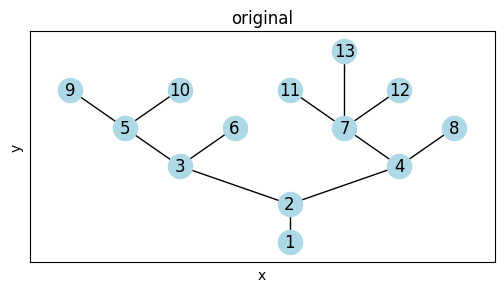

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd, mean radius, std radiusThere is no wh_ratio data
, There is no radius data,mean wh_ratio, std wh_ratioThere is no wh_ratio data
, There is no wh_ratio data
--------------------------------------
               mean length = 1.231
                 cv length = 0.221
            length entropy =   nan
                tortuosity = 1.000
       orientation entropy = 0.518
                      aspl = 3.128
                       cpd = 0.463
               mean degree = 1.846
                 cv degree = 0.619
 correlation vertex degree = -0.600
--------------------------------------
The mean degree is  1.8461538461538463


d:\codes_opensource\karstnet_karstnet_pubrepo\karstnet\karstnet\base.py:803: RuntimeWarning: invalid value encountered in divide
  freq = counts / sum(counts)  # Computes the frequencies


In [3]:
# The dictionary of nodes of the graph
nodes = {1 : (0, 0), 2 : (0, 1), 3 : (-1, 2), 4 : (1, 2),
         5 : (-1.5, 3), 6 : (-0.5, 3), 7 : (0.5, 3), 8 : (1.5, 3),
         9 : (-2, 4), 10 : (-1, 4), 11 : (0, 4), 12 : (1, 4), 13 : (0.5, 5)}

# The list of edges connecting the nodes
edges = [(1, 2), (2, 3), (2, 4), (3, 5), (3, 6), (4, 7), 
         (4, 8), (5, 9), (5, 10), (7, 11), (7, 12), (7, 13)]


# Creation of an instance k of the KGraph object using karstnet
k = kn.KGraph(edges, nodes)

# Plot the graph in 2D for checking
k.plot2()

# Computes the statistics of the graph
results = k.characterize_graph( verbose = True )

# The results are stored in a dictionnary. To extract the statistics of 
# interest use the name of the statistics as key. For example:
print("The mean degree is ", results["mean degree"])

### Compute stereo (P. Vernant's 2019 contribution) 
This new (dec. 2019) functionnality uses the mplstereonet library (https://github.com/joferkington/mplstereonet) in order to reproduce the drawings proposed in Collon et al. 2017 (https://doi.org/10.1016/j.geomorph.2017.01.034). Note that, density map values are weigthed by the real 3D length of the segments, while the Rose diagram is weigthed by the 2D projected lengths of segments on the horizontal plane.

AttributeError: module 'numpy' has no attribute 'float'.
`np.float` was a deprecated alias for the builtin `float`. To avoid this error in existing code, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

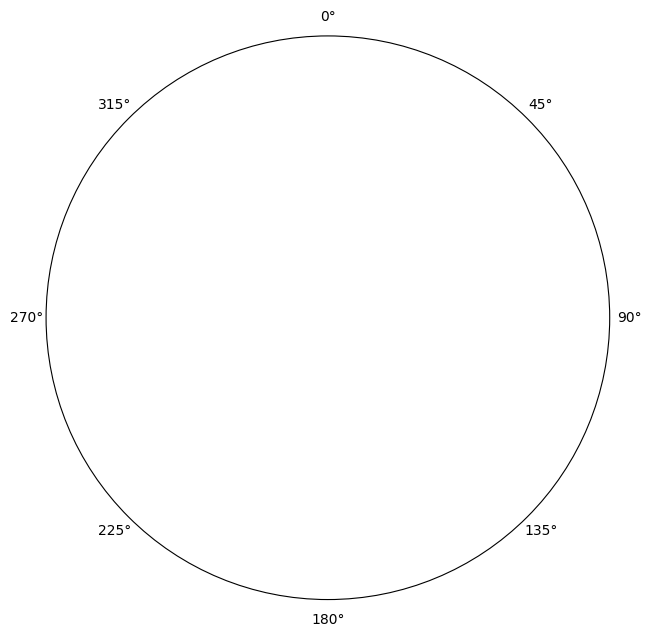

In [4]:
k.stereo()

To get Stereo and Rose diagram without weigthing by the lengths of the conduits, the option "weighted = False" can be used. As seen here, ignoring it can have a non negligeable impact...

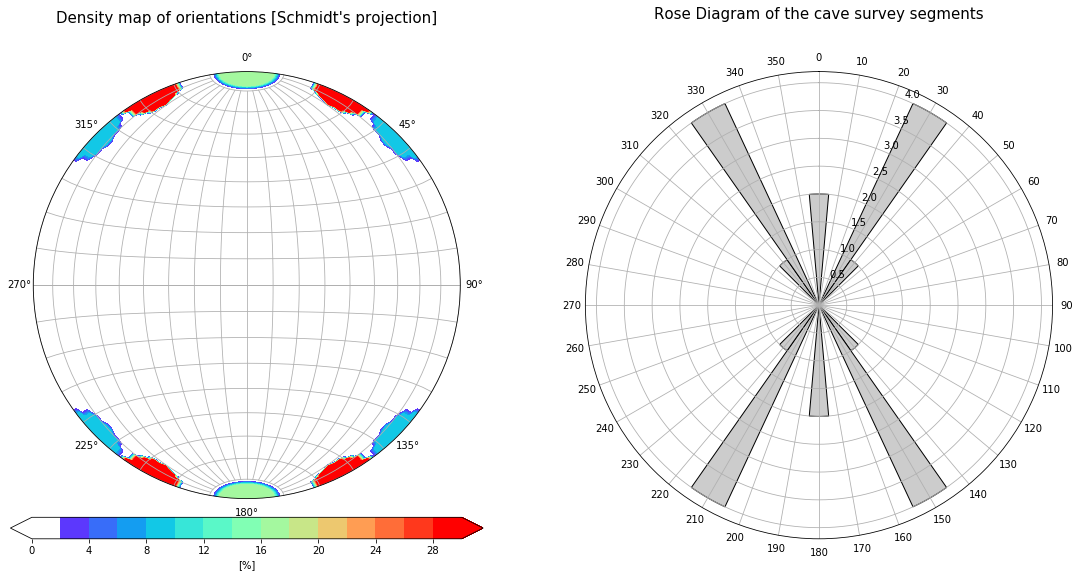

In [7]:
k.stereo(weighted = False)

## Computing Howard's parameters

All basic networks analysis (number of edges, connected components, cycles, extremities and junction nodes) and the three Howard's parameters (alpha, beta, gamma) as defined in : Howard, A. D., Keetch, M. E., & Vincent, C. L. (1970). Topological and geometrical properties of braided patterns. Water Resources Research, 6(6), 1674–1688, are available thanks to the Karsnet function basic_analysis() :


In [5]:
k.basic_analysis()


 This network contains :
 13  nodes (stations) and  12  edges.
  On the simplified graph, there are :  13  nodes (stations) and  12  edges,
 8  are extremity nodes (entries or exits) and  5  are junction nodes.
There is/are  1  connected component.s and  0  cycle.s.


Howard's parameter are (Howard, 1970) :  
 alpha:  0.0 
 beta 0.9230769230769231 
 gamma 0.36363636363636365

Note that this computation considers the node of degree 2  necessary to loop preservations as Seed Nodes, in order to  stay consistent with Howard's illustrations.


# Complete graph

Following the same idea as above, we construct below a complete graph: all nodes are connected to all nodes. Such a graph has no central point dominance, no variation in degrees, and its average shortest path length is 1. Let's check that this is correct.



 This network contains  1  connected components
There is no properties data


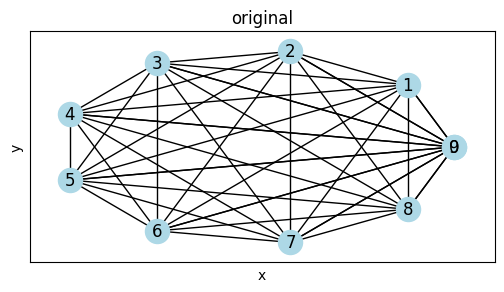

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd, mean radius, std radiusThere is no wh_ratio data
, There is no radius data,mean wh_ratio, std wh_ratioThere is no wh_ratio data
, There is no wh_ratio data
--------------------------------------
               mean length = 1.386
                 cv length = 0.385
            length entropy = 0.000
                tortuosity = 1.000
       orientation entropy = 0.841
                      aspl = 1.000
                       cpd = 0.000
               mean degree = 9.000
                 cv degree = 0.000
 correlation vertex degree = 1.000
--------------------------------------


In [6]:
# Use numpy module for computing the positions of the nodes
import numpy as np

# Construct the nodes and edges
# Number of nodes
npt = 10
nodes = {}
edges = []

for i in range(npt):
    angle = 2 * np.pi * i / (npt - 1) 
    nodes[i] = (np.cos(angle), np.sin(angle))  

for i in range(npt):
    for j in range(npt):
        if i != j:
            edges.append((i, j))

# Creates the graph            
k = kn.KGraph( edges, nodes)

# Plot it for verification
k.plot2()

# And computes the statistics
r = k.characterize_graph( verbose=True )

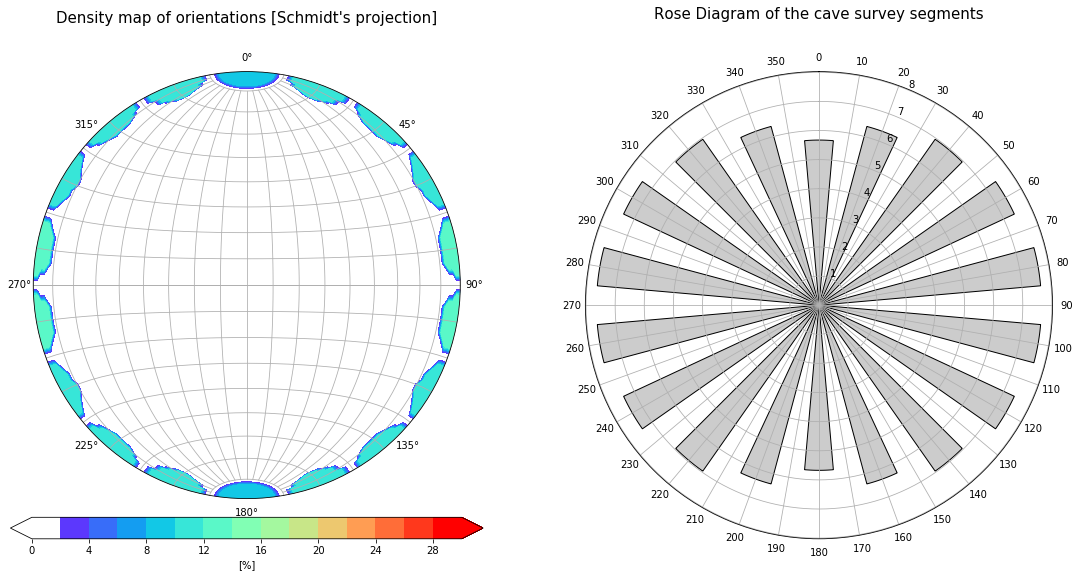

In [7]:
# Draw stereos
k.stereo()

# Simple tree with nodes of degree 2 and looping branch

This exemple, very similar to the first one, introduces a simple 2d graph with a looping branch (nodes 5-9-10), a node of degree 2 (node 14) and different cycles. This permits to test : 
* the computation of tortuosity in case of looping branch (which should be ignored as the real distance is nul between the startin and ending point)
* the functionning of graph simplification (node of degree 2 should disappear)



 This network contains  1  connected components


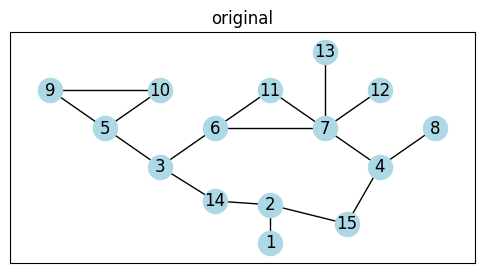

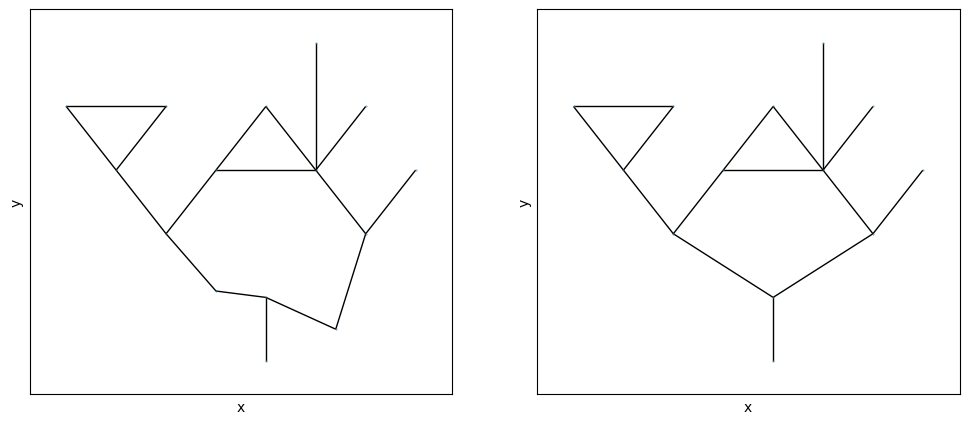

Computing:
 - mean length,cv length,length entropy,mean tortuosity

 - orientation entropy,aspl,cpd,md,cv degree,cvd
--------------------------------------
               mean length = 1.583
                 cv length = 0.457
            length entropy = 0.536
                tortuosity = 1.183
       orientation entropy = 0.584
                      aspl = 2.667
                       cpd = 0.328
               mean degree = 2.308
                 cv degree = 0.512
 correlation vertex degree = -0.447
--------------------------------------
The mean degree is  2.3076923076923075


In [8]:
# The dictionary of nodes of the graph
nodes = {1 : (0, 0), 2 : (0, 1), 3 : (-1, 2), 4 : (1, 2),
         5 : (-1.5, 3), 6 : (-0.5, 3), 7 : (0.5, 3), 8 : (1.5, 3),
         9 : (-2, 4), 10 : (-1, 4), 11 : (0, 4), 12 : (1, 4), 13 : (0.5, 5),
         14 : (-0.5,1.1), 15 : (0.7, 0.5)}

# The list of edges connecting the nodes
edges = [(1, 2), (2, 15), (15,4), (3, 5), (3, 6), (4, 7),(6,7), (6,11),
         (4, 8), (5, 9), (5, 10), (7, 11), (7, 12), (7, 13),(2,14),(14,3),(9,10)]


# Creation of an instance k of the KGraph object using karstnet
k = kn.KGraph(edges, nodes)

#Plot 2d graph for checking
k.plot2()
# Plot the original and simplified graphs in 2D top view for checking the simplification
k.plot()

# Computes the statistics of the graph
results = k.characterize_graph( verbose = True )

# The results are stored in a dictionnary. To extract the statistics of 
# interest use the name of the statistics as key. For example:
print("The mean degree is ", results["mean degree"])

Let's exploit some possibilities of Networkx library : 

In [9]:
#Compute the number of nodes
nb_nodes = k.graph.number_of_nodes()
nb_nodes_simple = k.graph_simpl.number_of_nodes()
print ("Nombre de noeud du graphe complet : ", nb_nodes,
      "\nNombre de noeud du graphe réduit : ", nb_nodes_simple)

Nombre de noeud du graphe complet :  15 
Nombre de noeud du graphe réduit :  13
